In [1]:
import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np
import os
#!{sys.executable} -m pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

import utils.exploratoryUtils

warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('../tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
if len(labels) > 0 and len(paths) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


dataset is loaded


*Convert into a dataframe*

In [3]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,../tess/OAF_disgust/OAF_bath_disgust.wav,disgust
1,../tess/OAF_disgust/OAF_live_disgust.wav,disgust
2,../tess/OAF_disgust/OAF_when_disgust.wav,disgust
3,../tess/OAF_disgust/OAF_rag_disgust.wav,disgust
4,../tess/OAF_disgust/OAF_chair_disgust.wav,disgust


### Exploratory Data Analysis

<AxesSubplot: xlabel='label', ylabel='count'>

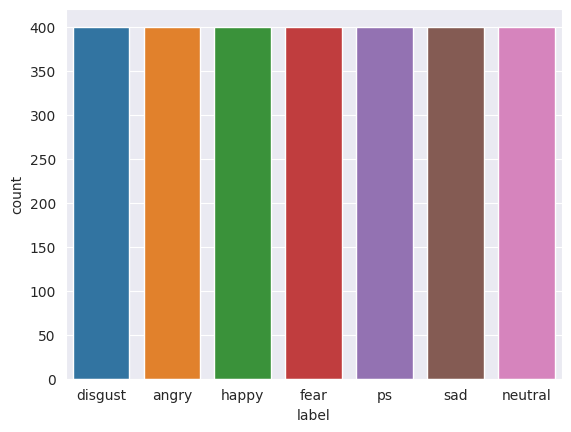

In [4]:
sns.countplot(x ='label', data= df)

In [5]:
#import sys
#module_path = os.path.abspath(os.path.join('..', 'utils'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

## Add paths

In [6]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
#__file__ = str(Path.cwd().parents[0] / "utils")
# in standard python
module_path = str(Path.cwd().parents[0] / "utils")

if module_path not in sys.path:
    sys.path.append(module_path)
import utils.exploratoryUtils as exU

In [7]:
#exU.spectogram()

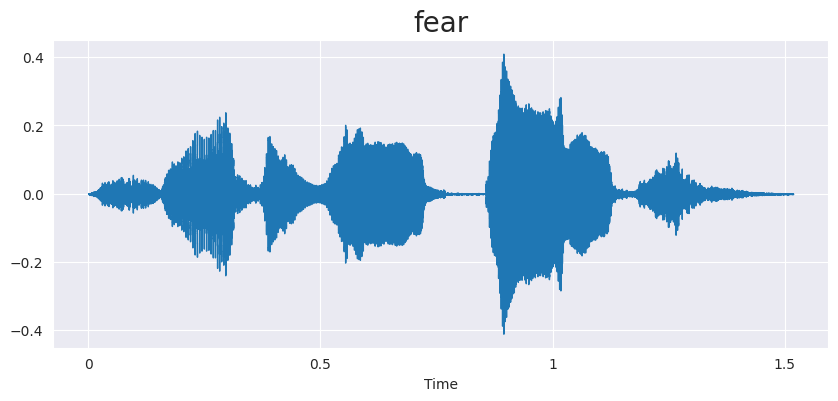

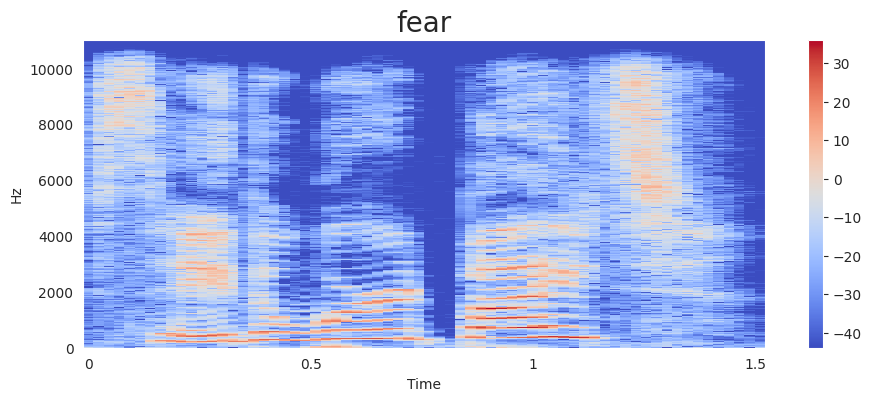

In [8]:
emotion = 'fear'
#df['speech'][df['label'] == 'fear'][1]
path = df['speech'][df['label']==emotion].iloc[20]
data, sampling_rate =librosa.load(path)
exU.waveplot(data, sampling_rate, emotion)
exU.spectogram(data, sampling_rate, emotion)
Audio(path)
# exU.extract_mfcc(path, offset=0.5, duration=3)
# exU.extract_f0(path)

(array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
        0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
        0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
        0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
        0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
        0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
        0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
        0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
        0.92879819, 0.95201814, 0.9752381 , 0.99845805]),
 array([         nan, 275.96343886, 304.43702144, 315.17296982,
        318.83510332, 316.99874826, 316.99874826, 324.40824276,
        333.91412986, 341.71900267, 343.69856071, 339.75084604,
        282.41377847,          nan,          nan,          nan,
        370.50092478, 353.76969727, 349.70630573, 349.70630573,
        353.76969727, 359.95348266, 362.03867197, 366.2453587 ,
        385.78

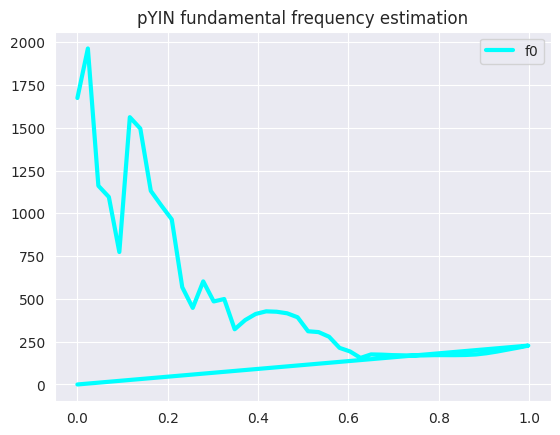

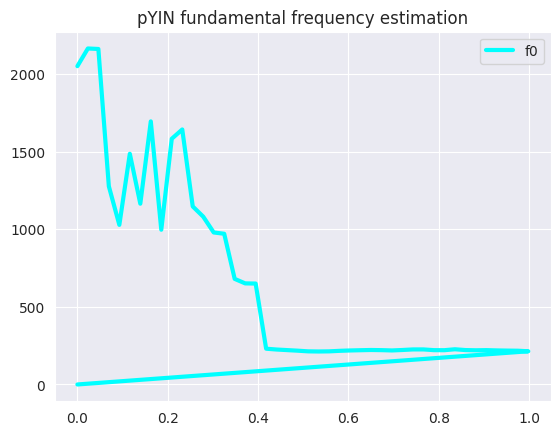

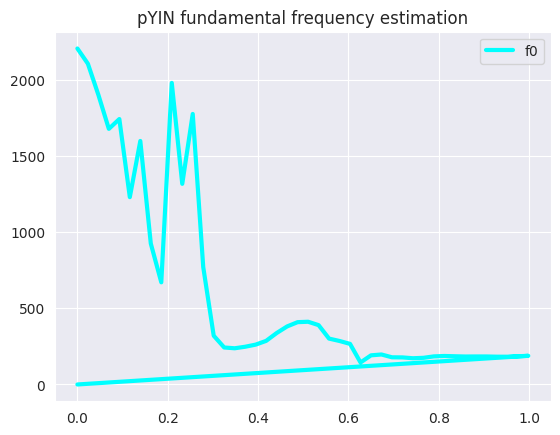

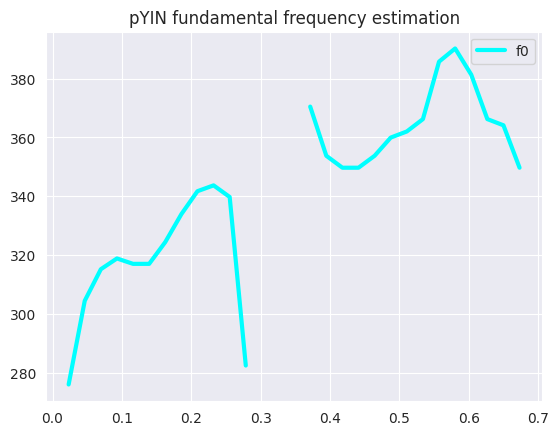

In [12]:
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='happy'], offset=0, duration=1)
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='sad'], offset=0, duration=1)
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='ps'], offset=0, duration=1)
exU.extract_f0(path)

In [10]:
(f0, times)

(array([1673.68185185, 1963.05846638, 1161.05190967, 1095.51120867,
         773.97598498, 1561.65717772, 1495.20118253, 1131.33312169,
        1045.98207737,  964.4552232 ,  568.33925509,  447.44600434,
         602.27281013,  485.10512036,  499.32351945,  322.48813732,
         376.26886362,  412.04084375,  427.3254527 ,  424.98118613,
         415.85547597,  392.60193068,  310.87879532,  306.02518403,
         278.93420426,  213.93577431,  192.88035988,  155.19299038,
         175.58488937,  174.39135775,  171.64537026,  170.35097038,
         168.96392241,  169.66945262,  171.44112254,  171.49795066,
         171.32279298,  172.27836781,  175.34875951,  182.29076742,
         192.05911224,  203.50878127,  214.74660005,  227.08316348,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]),
 array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
        0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
        

In [11]:
times

array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
       0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
       0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
       0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
       0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
       0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
       0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
       0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
       0.92879819, 0.95201814, 0.9752381 , 0.99845805, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])